# PROBLEM STATEMENT

You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

In [1]:
#beko, ml tries. synthetic data, made up generated dataset. check here for more info
#https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
#we need to import the data 1st.

In [3]:
#c.name,c.email,country,gender,age,annual_salary,cc_debt,net_worth are the features / feature cols. and we are trying to pred
#max car purchase amount specific customer might have
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [4]:
car_df.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### lets see the rship btw features, see their correlation 

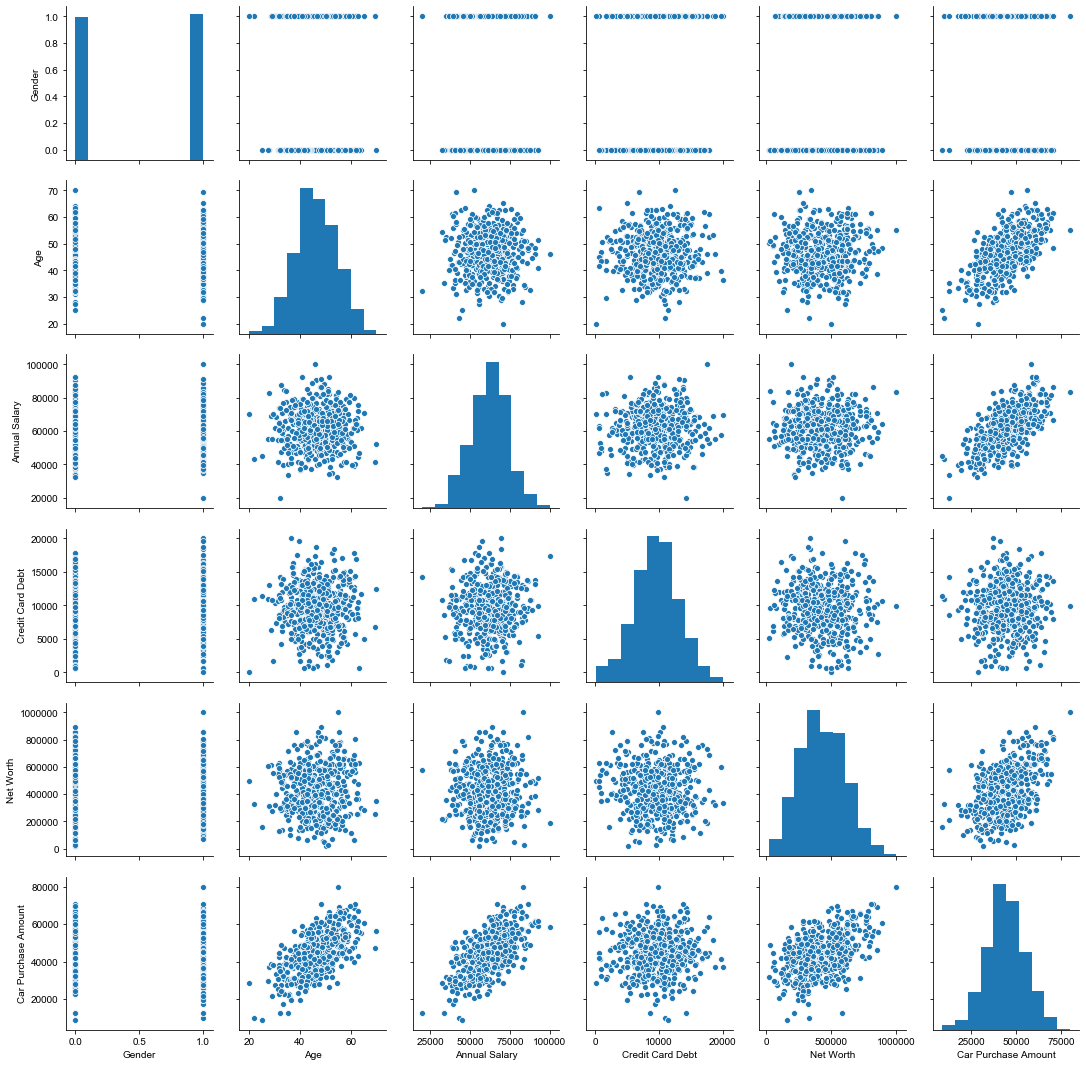

In [5]:
sns.pairplot(car_df)

sns.set(rc={'figure.figsize':(15,10)})

### data preprocessing parts

In [6]:
#seperate label from Y and seperate text part of the data as well
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [7]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [8]:
#total col,row and dtype info. there should be no missing col/value in X or y for ml model to work.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Gender              500 non-null int64
Age                 500 non-null float64
Annual Salary       500 non-null float64
Credit Card Debt    500 non-null float64
Net Worth           500 non-null float64
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [9]:
y = car_df['Car Purchase Amount']
y.shape

(500,)

In [10]:
#normalization,scaling is good for the model performance as well. and it effects the outcome accuracy as well.
#we need to make all this vlaues btw 0-1

In [11]:
#lets do the scaling part.
#here is math behind min-max scaling, axis=0 is col thus calculation is meaningful.
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

#to get rid of scientific notation use this option
np.set_printoptions(suppress=True)

In [12]:
#these are the biggest values of cols before scaling
scaler_x.data_max_

array([      1.,      70.,  100000.,   20000., 1000000.])

In [13]:
scaler_x.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [14]:
print(X_scaled)

[[0.         0.4370344  0.53515116 0.57836085 0.22342985]
 [0.         0.41741247 0.58308616 0.476028   0.52140195]
 [1.         0.46305795 0.42248189 0.55579674 0.63108896]
 ...
 [1.         0.67886994 0.61110973 0.52822145 0.75972584]
 [1.         0.78321017 0.37264988 0.69914746 0.3243129 ]
 [1.         0.53462305 0.51713347 0.46690159 0.45198622]]


In [15]:
X_scaled.shape

(500, 5)

In [16]:
y.shape

(500,)

In [17]:
y = y.values.reshape(-1,1)

In [18]:
y.shape

(500, 1)

In [19]:
y

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [20]:
scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y)


In [21]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

### we need to train our models

In [22]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [23]:
#2 dense layer (fully connected,defult layer with) wll b investigated

import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [24]:
#selecting optimzation format and metrics to measure its performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)
#what is val_split. its to avoid overfit, we even dont use some portion of the training set. in normal conditions we have 375
#tr and 125 test set then this 375 splitted further into 300 and 75 pieces (0.2-0.8) and just training used only with 300 pts

#model exposed to this 75 points while training from time to time to avoid overfit. batch_size: how many data points exposed
#to our model on each time.25 samples fed to the network per batch, verbose is about info showing while training
#verbose 1 show duration as miliseconds while verbose=2 doesnt show that.

Train on 300 samples, validate on 75 samples
Epoch 1/20
300/300 [==============================] - 1s 3ms/step - loss: 0.1135 - val_loss: 0.0631
Epoch 2/20
300/300 [==============================] - 0s 110us/step - loss: 0.0325 - val_loss: 0.0264
Epoch 3/20
300/300 [==============================] - 0s 103us/step - loss: 0.0204 - val_loss: 0.0158
Epoch 4/20
300/300 [==============================] - 0s 100us/step - loss: 0.0113 - val_loss: 0.0117
Epoch 5/20
300/300 [==============================] - 0s 100us/step - loss: 0.0098 - val_loss: 0.0112
Epoch 6/20
300/300 [==============================] - 0s 110us/step - loss: 0.0089 - val_loss: 0.0093
Epoch 7/20
300/300 [==============================] - 0s 100us/step - loss: 0.0081 - val_loss: 0.0087
Epoch 8/20
300/300 [==============================] - 0s 96us/step - loss: 0.0074 - val_loss: 0.0080
Epoch 9/20
300/300 [==============================] - 0s 100us/step - loss: 0.0067 - val_loss: 0.0071
Epoch 10/20
300/300 [===================

In [26]:
#20 times all weights are tweaked. end result is loss =~0 and val loss=~0 as well. high chance of overfit.
#each time model uses different samples on each time they dont use same 300 data thus we are getting dif loss values. but we
#can test the system for different batch sizes and different epochs as well.

#batch size and epochs could change the loss result and val result as well.

In [27]:
print(epochs_hist.history.keys())


dict_keys(['val_loss', 'loss'])


In [28]:
#system stores val_loss and loss values for our use in plotting section
epochs_hist.history["loss"]

[0.11345627934982379,
 0.03252659187031289,
 0.020399267474810284,
 0.01134589989669621,
 0.009792928351089358,
 0.008889141376130283,
 0.008114896287831167,
 0.007363557543916007,
 0.006705263280309737,
 0.006066692740811656,
 0.005526874253215889,
 0.005030345540338506,
 0.004379104143784692,
 0.00381395744625479,
 0.003357704457206031,
 0.002904541111396005,
 0.0025925172570471964,
 0.002248764969408512,
 0.0019319886632729322,
 0.0016438919022524108]

In [29]:
epochs_hist.history["val_loss"]

[0.06309633205334346,
 0.026381174412866432,
 0.015844343695789576,
 0.011732221581041813,
 0.011153178289532661,
 0.009323243672649065,
 0.008717282364765802,
 0.008009328972548246,
 0.007072173524647951,
 0.006309016607701778,
 0.005593532541145881,
 0.005114223187168439,
 0.0042803500934193535,
 0.003744449932128191,
 0.0031296188632647195,
 0.002730136038735509,
 0.002222116842555503,
 0.0018378373157853882,
 0.0016282475941504042,
 0.0013200506606760125]

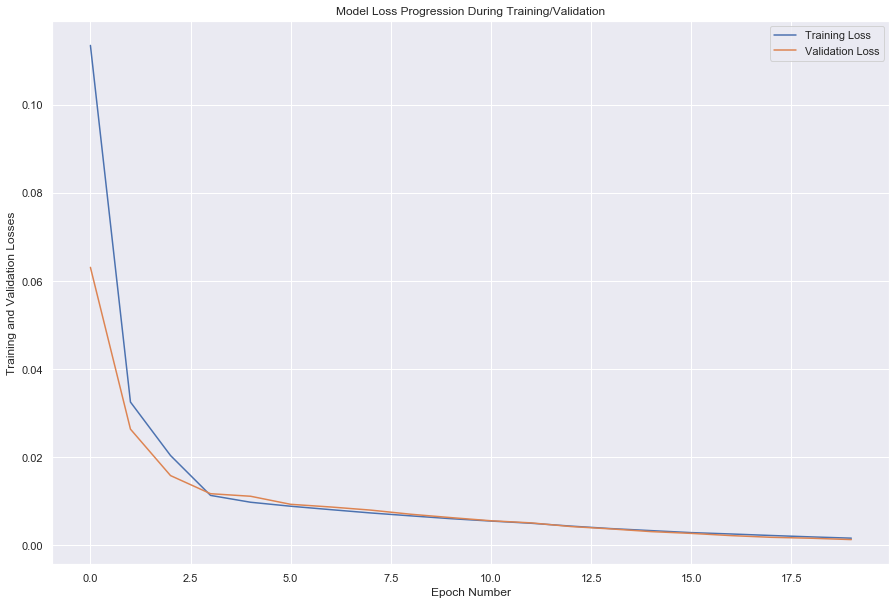

In [30]:
#how validation loss and training loss were affected. this time lets make it more beautiful.
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [31]:
#lets make a prediction. 
X.columns
#remember this column order.

Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'], dtype='object')

In [32]:
X_pred_test=np.array([[0,35,55000,12500,320000]])
#female,age=35,annual_salary=55k,cc_debt=12.5k,net_worth=320k 

In [33]:
#its very important to set shape as 1*5 not as 5, or ,5. Be careful about double sqr brackets.
X_pred_test.shape

(1, 5)

In [34]:
#car purchase prediction amount will be 93k.
print("predicted car purchase amount for specific fellow:",model.predict(X_pred_test))

predicted car purchase amount for specific fellow: [[93991.13]]
